<a href="https://colab.research.google.com/github/MayyarAA/ForecastingNeuralNetworks/blob/main/MSCI433A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import scipy
import pandas
import matplotlib.pyplot as plt
import sklearn    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')     

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

ClimateChange.csv  MSCI433A1.ipynb   pokemon_data_modified1.csv
demo1.ipynb	   pokemon_data.csv  StateData.csv


In [3]:
data1 = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/StateData.csv")
data1.head()

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude,Region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,-86.7509,32.5901,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,-127.2500,49.2500,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,-111.6250,34.2192,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,-92.2992,34.7336,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,-119.7730,36.5341,West


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Population      50 non-null     int64  
 1   Income          50 non-null     int64  
 2   Illiteracy      50 non-null     float64
 3   LifeExp         50 non-null     float64
 4   Murder          50 non-null     float64
 5   HighSchoolGrad  50 non-null     float64
 6   Frost           50 non-null     int64  
 7   Area            50 non-null     int64  
 8   Longitude       50 non-null     float64
 9   Latitude        50 non-null     float64
 10  Region          50 non-null     object 
dtypes: float64(6), int64(4), object(1)
memory usage: 4.4+ KB


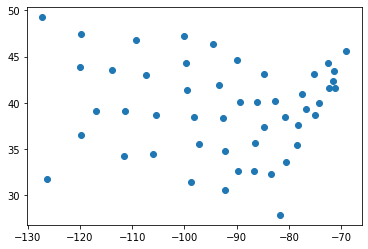

In [4]:
#a)i
statedata = data1
#statedata['Region'] = pandas.to_pickle (statedata['Region'],errors='coerce')
#statedata.head()
plt.scatter(x=statedata["Longitude"],y=statedata["Latitude"])

In [5]:
#a)ii
regions_highschoolgradmean = statedata.groupby(by="Region").mean()
regions_highschoolgradmean

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude
Region,,,,,,,,,,
North Central,4803.000000,4611.083333,0.700000,71.766667,5.275000,54.516667,138.833333,62652.000,-92.562783,42.171567
Northeast,5495.111111,4570.222222,1.000000,71.264444,4.722222,53.966667,132.777778,18141.000,-72.756411,42.535956
South,4208.125000,4011.937500,1.737500,69.706250,10.581250,44.343750,64.625000,54605.125,-85.174487,34.610344
West,2915.307692,4702.615385,1.023077,71.234615,7.215385,62.000000,102.153846,134463.000,-114.988769,40.606854


In [53]:

regions_highschoolgradmean

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude
Region,,,,,,,,,,
North Central,4803.000000,4611.083333,0.700000,71.766667,5.275000,54.516667,138.833333,62652.000,-92.562783,42.171567
Northeast,5495.111111,4570.222222,1.000000,71.264444,4.722222,53.966667,132.777778,18141.000,-72.756411,42.535956
South,4208.125000,4011.937500,1.737500,69.706250,10.581250,44.343750,64.625000,54605.125,-85.174487,34.610344
West,2915.307692,4702.615385,1.023077,71.234615,7.215385,62.000000,102.153846,134463.000,-114.988769,40.606854


In [56]:
statedata
statedata.head()

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude,Region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,-86.7509,32.5901,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,-127.2500,49.2500,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,-111.6250,34.2192,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,-92.2992,34.7336,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,-119.7730,36.5341,West


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7fa9dd1b27d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa9dd161a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa9dd169a10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa9dd169510>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa9dd15bf50>,
  <matplotlib.lines.Line2D at 0x7fa9dd11a510>]}

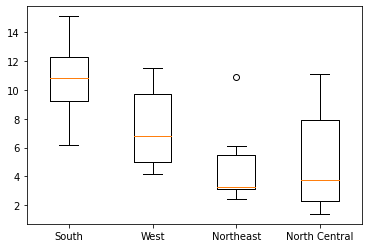

In [68]:
#a)iii
#box plot for murder in each region 
#df_box = statedata_region.iloc[:,4]
#df_box
murderfor_southregion = statedata.loc[statedata['Region']=='South','Murder']

murderfor_westhregion = statedata.loc[statedata['Region']=='West','Murder']

murderfor_northeasthregion = statedata.loc[statedata['Region']=='Northeast','Murder']

murderfor_northcentralregion = statedata.loc[statedata['Region']=='North Central','Murder']
plt.boxplot([murderfor_southregion,murderfor_westhregion,murderfor_northeasthregion,murderfor_northcentralregion],labels=['South','West','Northeast','North Central'])

In [48]:
murder_preregion = statedata.groupby(['Region']).count()
murder_preregion

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude
Region,,,,,,,,,,
North Central,12,12,12,12,12,12,12,12,12,12
Northeast,9,9,9,9,9,9,9,9,9,9
South,16,16,16,16,16,16,16,16,16,16
West,13,13,13,13,13,13,13,13,13,13


In [51]:
murder_preregion_temp = murder_preregion.loc[:,'Murder']
murder_preregion_temp

Region
North Central    12
Northeast         9
South            16
West             13
Name: Murder, dtype: int64

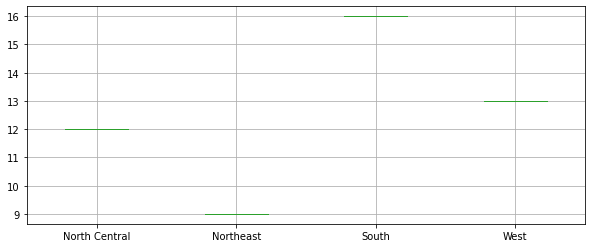

In [52]:
murder_preregion_temp.to_frame().T.boxplot(figsize=(10,4))

In [87]:
#Q1.b)i
#split the data set into test and training data
X_statedata = statedata.loc[:,['Population','Income','Illiteracy','Murder','HighSchoolGrad','Frost','Area']]
Y_statedata = statedata["LifeExp"]
X_train, X_test, y_train, y_test = train_test_split(X_statedata,Y_statedata,test_size=0.2 )

In [94]:
regrStateData = LinearRegression()  
regrStateData.fit(X_train, y_train)
print(regrStateData.score(X_test, y_test))

0.6596781865388708


In [105]:
#Q1.b)i
#other way of doing it similar to ta

statedata_linreg_mode = LinearRegression().fit(X=X_statedata,y=Y_statedata)
print(statedata_linreg_mode.score(X_statedata,Y_statedata))

0.7361562689089038


In [103]:
coeefficents_statedata = pandas.DataFrame(statedata_linreg_mode.coef_,X_statedata.columns,columns=['Coefficient'])
print(f'Intercept: {statedata_linreg_mode.intercept_}\tR2: {statedata_linreg_mode.score(X_statedata,Y_statedata)}')
coeefficents_statedata

Intercept: 70.94322411112944	R2: 0.7361562689089038


,Coefficient
Population,5.180036e-05
Income,-2.180424e-05
Illiteracy,3.382032e-02
Murder,-3.011232e-01
HighSchoolGrad,4.892948e-02
Frost,-5.735001e-03
Area,-7.383166e-08


In [ ]:
print("regr.coef_ ",regr.coef_  ," regr.intercept_ ",  regr.intercept_)

regr.coef_  [ 6.42053134e-02  6.45735927e-03  1.24041896e-04 -1.65280033e-02
 -6.63048889e-03  3.80810324e-03  9.31410835e-02 -1.53761324e+00]  regr.intercept_  -124.59426040111505


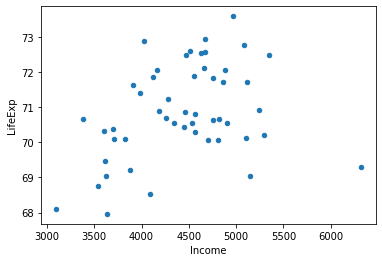

In [ ]:
#Q1.b)iii
statedata.plot.scatter(x='Income',y='LifeExp')

In [134]:
#Q1.c)

#X_statedata_partcv1 = statedata.loc[:,['Population','Income','Illiteracy','Murder','HighSchoolGrad','Frost','Area']]
X_statedata_columns_partc_v1 = ['Population','Illiteracy','Murder','HighSchoolGrad']
X_statedata_partcv1 = statedata.loc[:,X_statedata_columns_partc_v1]
Y_statedata_partcv1 = statedata["LifeExp"]


statedata_linreg_mode_partcv1 = LinearRegression().fit(X=X_statedata_partcv1,y=Y_statedata_partcv1)
print(statedata_linreg_mode_partcv1.score(X_statedata_partcv1,Y_statedata_partcv1))

0.7124081253116803


In [135]:
coeefficents_statedata_partcv1 = pandas.DataFrame(statedata_linreg_mode_partcv1.coef_,X_statedata_columns_partc_v1,columns=['Coefficient'])
print(f'Intercept: {statedata_linreg_mode_partcv1.intercept_}\tR2: {statedata_linreg_mode_partcv1.score(X_statedata_partcv1,Y_statedata_partcv1)}')
coeefficents_statedata_partcv1

Intercept: 69.55217426853258	R2: 0.7124081253116803


,Coefficient
Population,0.000069
Illiteracy,0.395570
Murder,-0.302238
HighSchoolGrad,0.052732


In [ ]:
#Question 2

In [ ]:
# Question 2 climate change 
climatedata = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/ClimateChange.csv")
climatedata.head()
#climatedata.size

,Year,Month,MEI,CO2,CH4,N2O,CFC.11,CFC.12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [ ]:
#split the data set into test and training data
X = climatedata.iloc[:,2:10]
Y = climatedata["Temp"]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33 )
X_train.size

1648

In [ ]:
#a)
#training data
X_2006_train = climatedata.loc[(climatedata['Year']<=2006),['MEI','CO2','CH4',	'N2O'	,'CFC.11'	,'CFC.12'	,'TSI','Aerosols']]
Y_2006_train = climatedata.loc[(climatedata['Year']<=2006),'Temp']
#testing data
X_after2006_test = climatedata.loc[(climatedata['Year']>2006),['MEI','CO2','CH4',	'N2O'	,'CFC.11'	,'CFC.12'	,'TSI','Aerosols']]
Y_after2006_test = climatedata.loc[(climatedata['Year']>2006),'Temp']

In [ ]:
X_2006_train

,MEI,CO2,CH4,N2O,CFC.11,CFC.12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619
...,...,...,...,...,...,...,...,...
279,0.759,380.45,1762.66,319.930,248.981,539.682,1365.7067,0.0041
280,0.793,378.92,1776.04,320.010,248.775,539.566,1365.8419,0.0043
281,0.892,379.16,1789.02,320.125,248.666,539.488,1365.8270,0.0044
282,1.292,380.18,1791.91,320.321,248.605,539.500,1365.7039,0.0049


In [ ]:
regr = LinearRegression()
  
regr.fit(X_2006_train, Y_2006_train)

print(regr.score(X_after2006_test, Y_after2006_test))

0.1837783533313586


In [ ]:
print("regr.coef_ ",regr.coef_  ," regr.intercept_ ",  regr.intercept_)

regr.coef_  [ 6.42053134e-02  6.45735927e-03  1.24041896e-04 -1.65280033e-02
 -6.63048889e-03  3.80810324e-03  9.31410835e-02 -1.53761324e+00]  regr.intercept_  -124.59426040111505
